
# Задачі кластеризації та класифікації


<h2>Мета</h2>

Ознайомитись з різновидами моделей для задач кластеризації та класифікації, а також методами побудови та оцінки цих моделей. Після завершення цієї лабораторної роботи ви зможете:

* Використовувати прості моделі для задач кластеризації та класифікації
* Використовувати перехресну перевірку для оцінки якості моделі
* Обирати оптимальну складність моделі для уникнення перенавчання
* Вдосконалювати моделі за допомогою підбору параметрів


<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>


1. Скачайте дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Виконайте кластеризацію по ВВП на душу населення та щільності населення.
2. Використайте метод ліктя для підбору оптимальної кількості кластерів.
3. Визначіть, який регіон домінує в кожному з кластерів.
4. Побудуйте кілька (3-5) моделей класифікації, що визначають регіон, до якого належить країна, по ознаках 'GDP per capita', 'Population', 'CO2 emission', 'Area'. Оцініть точність класифікації (використайте 20% загального набору в якості тестових даних).
5. Для однієї з моделей виконайте підбір параметра. Обгрунтуйте ваш вибір.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import mean_squared_error, r2_score, classification_report, silhouette_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Виконайте кластеризацію по ВВП на душу населення та щільності населення. </p>
</div>


Зчитую дані з файлу у датафрейм


In [2]:
path = "clean_data2.csv"
df = pd.read_csv(path)
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470,164.427660


Виділяю параметри для кластеризації

In [3]:
features = df[['GDP per capita', 'Population density']]
features

,GDP per capita,Population density
0,561.778746,53.083405
1,4124.982390,100.038296
2,3916.881571,17.048902
3,11834.745230,277.995000
4,36988.622030,164.427660
...,...,...
212,13445.593416,294.145714
213,2943.404534,756.074086
214,990.334774,52.245796
215,1269.573537,22.045136


Будую модель методом k середніх з кількістю кластерів 5

In [4]:
kmeans1 = KMeans(
    init='random',
    n_clusters=5,
    n_init=10,
    max_iter=300
)
kmeans1.fit(features)

C:\Users\oksan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=5, n_init=10)

<p>Отримані центри кластерів:</p>


In [5]:
kmeans1.cluster_centers_

array([[ 7672.17076247,   170.30355893],
       [15973.23179351,   633.33689748],
       [ 2133.72487393,   129.86124123],
       [70801.76889125,  2646.54657044],
       [41405.71044696,   809.5330085 ]])

<p>Масив із номерами кластерів для кожного рядка даних:</p>


In [6]:
kmeans1.labels_

array([2, 2, 2, 1, 4, 2, 1, 1, 2, 1, 4, 4, 2, 4, 1, 2, 1, 0, 4, 2, 2, 1,
       2, 2, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 4, 1, 2, 2, 1, 1, 0, 0, 2,
       2, 2, 0, 2, 1, 1, 1, 1, 1, 4, 1, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 0,
       4, 4, 1, 0, 2, 2, 4, 2, 1, 1, 1, 0, 4, 2, 2, 2, 2, 2, 2, 4, 1, 3,
       2, 2, 0, 2, 3, 1, 4, 4, 2, 4, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0,
       2, 2, 1, 1, 1, 3, 3, 0, 2, 2, 0, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 2,
       0, 2, 2, 2, 2, 0, 2, 4, 1, 4, 2, 1, 2, 1, 3, 1, 2, 1, 1, 2, 2, 0,
       2, 1, 1, 4, 3, 0, 0, 2, 2, 4, 2, 1, 2, 0, 1, 2, 4, 1, 1, 1, 2, 2,
       0, 1, 1, 2, 1, 0, 1, 0, 2, 0, 2, 4, 3, 1, 2, 2, 0, 2, 2, 2, 1, 2,
       0, 0, 1, 2, 2, 2, 4, 4, 3, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2])

<p>Візуалізую отримані кластери:</p>


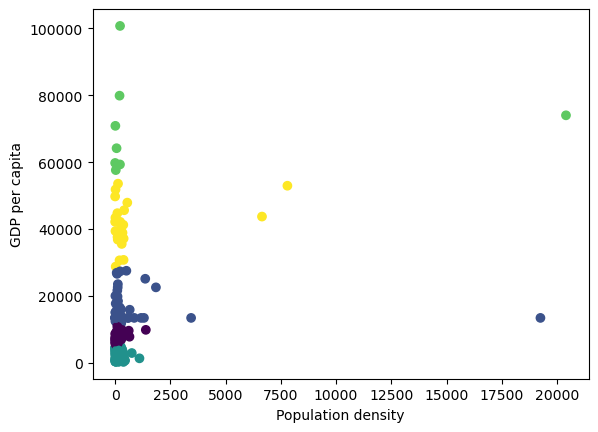

In [7]:
plt.xlabel('Population density')
plt.ylabel('GDP per capita')
plt.scatter(df[['Population density']], df[['GDP per capita']], c=kmeans1.labels_)
plt.show()

<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Використайте метод ліктя для підбору оптимальної кількості кластерів.</p>
</div>


Визначаю оптимальну кількість кластерів. Скористаюсь методом "ліктя". Для цього ініціалізую алгоритм k середніх кількістю кластерів від 1 до 10 і для кожної моделі рахую суму квадратів похибок (евклідових відстаней точок кластерів від відповідних центрів):

In [8]:
kmeans_kwargs = {
    'init': 'random',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42,
}

sse = []
max_kernels = 10
for k in range(1, max_kernels + 1):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)
    
    

C:\Users\oksan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\oksan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\oksan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\oksan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

<p>Візуалізую отримані результати:</p>


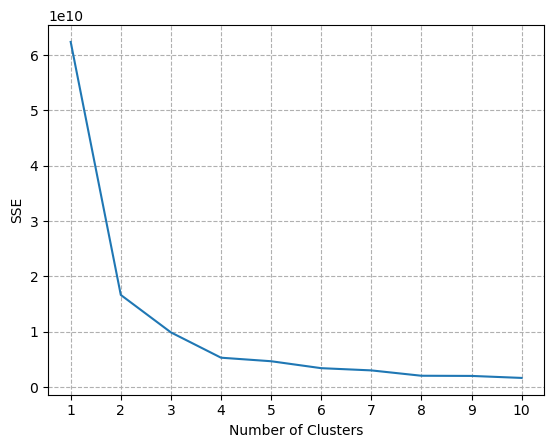

In [9]:
plt.plot(range(1, max_kernels + 1), sse)
plt.xticks(range(1, max_kernels + 1))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid(linestyle='--')
plt.show()

<p>Оптимальна кількість кластерів дорівнює 4</p>
<p>Візуалізую для оптимальної кількості кластерів:</p>

C:\Users\oksan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


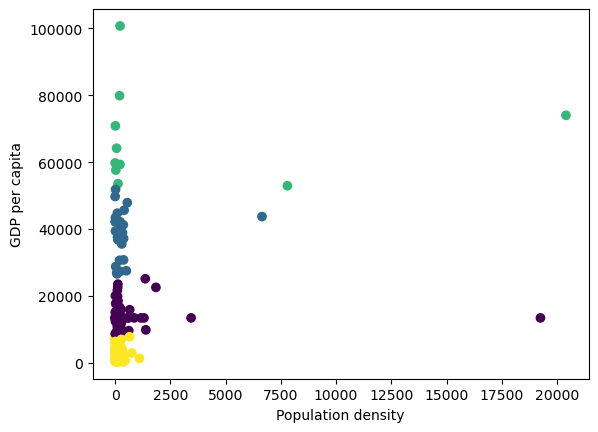

In [10]:
kmeans = KMeans(
    init='random',
    n_clusters=4,
    n_init=10,
    max_iter=300
)
kmeans.fit(features)

plt.xlabel('Population density')
plt.ylabel('GDP per capita')
plt.scatter(df[['Population density']], df[['GDP per capita']], c=kmeans.labels_)
plt.show()

<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Визначіть, який регіон домінує в кожному з кластерів.</p>
</div>


Додаю мітки кластерів в датафрейм

In [15]:
df['Cluster'] = kmeans1.labels_

Визначаю домінуючий регіон для кожного кластера

In [17]:
cluster_region_counts = df.groupby(['Cluster', 'Region']).size()

dominant_regions = cluster_region_counts.groupby(level=0).idxmax()

for cluster, region_tuple in dominant_regions.items():
    region = region_tuple[1]
    print(f"Cluster {cluster} is dominated by region: {region}")

Cluster 0 is dominated by region: Latin America & Caribbean
Cluster 1 is dominated by region: Europe & Central Asia
Cluster 2 is dominated by region: Sub-Saharan Africa
Cluster 3 is dominated by region: Europe & Central Asia
Cluster 4 is dominated by region: Europe & Central Asia


<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте кілька (3-5) моделей класифікації, що визначають регіон, до якого належить країна, по ознаках 'GDP per capita', 'Population', 'CO2 emission', 'Area'. Оцініть точність класифікації (використайте 20% загального набору в якості тестових даних).</p>
</div>


 Обираю потрібні ознаки:


In [18]:
features=pd.get_dummies(df[['GDP per capita', 'Population', 'CO2 emission', 'Area']])
features[['Region']] = df[['Region']]

 Розділяю датасет на навчальну і тестову вибірки за допомогою функції <code>train_test_split()</code>:


In [19]:
df_train, df_test = train_test_split(
    features, 
    test_size=0.2, 
    random_state=1
)

<p>Розміщую цільові дані - Region -  в окремому датафреймі:</p>

In [20]:
x_train = df_train[['GDP per capita', 'Population', 'CO2 emission', 'Area']]
y_train = df_train[['Region']]

x_test = df_test[['GDP per capita', 'Population', 'CO2 emission', 'Area']]
y_test = df_test[['Region']]

<h3>Навчання та тестування моделей:</h3>

Для навчання були обрані наступні методи:

- K-Nearest Neighbors (k-NN);
- Support Vector Machines (SVM);
- Decision Tree;
- Random Forest;
- Extra Trees.

 <h3>K-Nearest Neighbors (k-NN)</h3>


Будую модель


In [21]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train, y_train)

C:\Users\oksan\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

Оцінюю точність

In [22]:
print('mean accuracy = ', KNN_model.score(x_test, y_test))

mean accuracy =  0.22727272727272727


 <h3>Support Vector Machines (SVM)</h3>


Будую модель


In [23]:
SVC_model = SVC()
SVC_model.fit(x_train, y_train)

C:\Users\oksan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

Оцінюю точність

In [24]:
print('mean accuracy = ', SVC_model.score(x_test, y_test))

mean accuracy =  0.3181818181818182


 <h3>Decision Tree</h3>


Будую модель


In [25]:
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=1)
tree_scores = cross_val_score(decision_tree, x_train, y_train, cv=5)

C:\Users\oksan\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Оцінюю точність

In [26]:
decision_tree.fit(x_train, y_train)
decision_tree.score(x_test, y_test)

0.5227272727272727

 <h3>Random Forest</h3>


Будую модель


In [27]:
randomforest = RandomForestClassifier(max_depth=5)
randomforest.fit(x_train, y_train)

C:\Users\oksan\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5)

Оцінюю точність

In [28]:
randomforest.score(x_test, y_test)

0.45454545454545453

 <h3>Extra Trees</h3>


Будую модель


In [29]:
extratrees = ExtraTreesClassifier(max_depth=5)
extratrees.fit(x_train, y_train)

C:\Users\oksan\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesClassifier(max_depth=5)

Оцінюю точність

In [30]:
extratrees.score(x_test, y_test)

0.5681818181818182

<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Для однієї з моделей виконайте підбір параметра. Обгрунтуйте ваш вибір.</p>
</div>


<p>Скористаюсь методом "ліктя" для визначення параметра кількості сусідів методу k-nearest neighbors </p>
<p>Для цього ініціалізую алгоритм з параметром від 1 до 100 і для кожної моделі порахую mean accuracy:</p>

In [31]:
accur = []
max_kernels = 100
for k in range(1, max_kernels + 1):
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(x_train, y_train)
    accur.append(KNN_model.score(x_test, y_test))
    

C:\Users\oksan\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\oksan\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\oksan\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\oksan\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

 Отримані показники якості візуалізую на графіку:


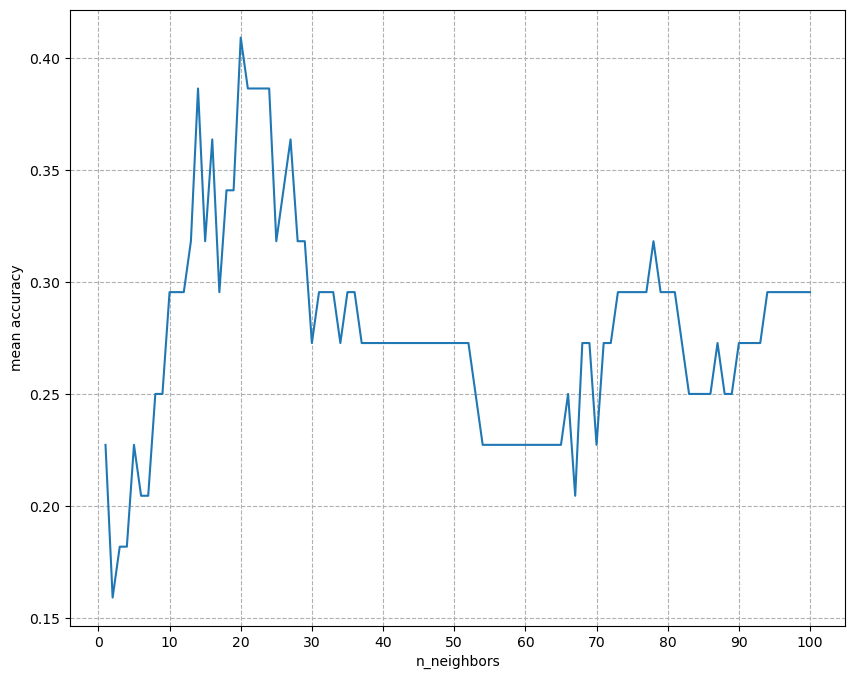

In [32]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_kernels + 1), accur)
plt.xticks(range(0, max_kernels + 1,10))
plt.xlabel('n_neighbors')
plt.ylabel('mean accuracy')
plt.grid(linestyle='--')
plt.show()

З графіку бачу, що найкраще значення параметра n_neighbors знаходиться в межах від 20 до 30, тому що найкраще значення знаходиться там, де крива точності досягає найвищої точки і починає вирівнюватися або злегка знижуватися.


<a name="task6"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Використовуючи файл <a href="https://drive.google.com/file/d/1gxqzPQNlqrwrJI3zstMsvHQAbsdMPe-2/view?usp=drive_link" target="_blank">Data5.csv</a>:

1. Визначити кластер країн з найкращим розвитком (кластеризувати по Ie, Iec, Is; для k-середніх використати 4 кластера). Побудувати центри кластерів.
2. Провести кластеризацію по Сql, порахувати скільки країн потрапило в різні кластери, якщо порівнювати з п1.</p>
</div>


Згідно з методологією вимірювання сталого розвитку країн, сталий розвиток оцінюється за допомогою відповідного індексу у просторі трьох вимірів: економічного (Іес), екологічного (Іе) і соціально-інституціонального (Is). Цей індекс є вектором, норма якого визначає рівень сталого розвитку, а його просторове положення в системі координат (Iec,Ie,Is) характеризує міру «гармонійності» цього розвитку.

<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# Зчитуємо заданий набір даних, зразу коригуючи
df = pd.read_csv(
    'Data5.csv', encoding='windows-1251', sep=';', decimal=','
).rename(columns={'Unnamed: 0': 'Country'})

df

```

</details>



In [33]:
# Зчитуємо заданий набір даних, зразу коригуючи
df = pd.read_csv(
    'Data5.csv', encoding='windows-1251', sep=';', decimal=','
).rename(columns={'Unnamed: 0': 'Country'})

print(df.head())

features = df[['Ie', 'Iec', 'Is']]
kmeans1 = KMeans(
    n_clusters=4,
    init='random',
    n_init=10,
    max_iter=300
)

kmeans1.fit(features)

df['claster'] = kmeans1.labels_
mean_values = df.groupby('claster').apply(lambda group: (group['Ie'] + group['Iec'] + group['Is']).mean() / 3)

print("Середні значення кластерів (Ie, Iec, Is):")
print(mean_values)
print("Центри кластерів:")
print(kmeans1.cluster_centers_)

# Кластеризація за Cql
kmeans2 = KMeans(
    n_clusters=4,
    init='random',
    n_init=10,
    max_iter=300
)

kmeans2.fit(df[['Cql']])
df['cluster_Cql'] = kmeans2.labels_

# Порівняння кластерів
df['mismatch'] = df['claster'] != df['cluster_Cql']

# Кількість країн з невідповідностями
mismatch_count = df['mismatch'].sum()
print(f"Кількість країн з невідповідностями : {mismatch_count}")

C:\Users\oksan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


     Country  ISO         UA       Cql        Ie       Iec        Is
0    Albania  ALB    Албанія  0.973924  0.605348  0.538673  0.510113
1    Algeria  DZA      Алжир  0.782134  0.587219  0.348159  0.497986
2     Angola  AGO     Ангола  0.372344  0.274394  0.332117  0.346907
3  Argentina  ARG  Аргентина  0.883830  0.699685  0.281995  0.518820
4    Armenia  ARM   Вірменія  1.016499  0.718327  0.535648  0.486498
Середні значення кластерів (Ie, Iec, Is):
claster
0    0.451569
1    0.670589
2    0.341560
3    0.529040
dtype: float64
Центри кластерів:
[[0.43803661 0.43921143 0.47745761]
 [0.74939043 0.64069787 0.62167812]
 [0.23870438 0.39106559 0.39491063]
 [0.63202815 0.46605385 0.48903674]]


C:\Users\oksan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Кількість країн з невідповідностями : 54


<h2>Виконала студентка групи ІП-21 <br> Гордич Оксана</h2>
